In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#loading the dataset and Displaying the first few rows of the datafram
df=pd.read_csv(r"C:\Users\madin\Downloads\Global-Superstore.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [11]:
#Displaying the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [26]:
# Displaying the basic information about the dataset
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
min,1.00000,2011-01-01 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,2012-06-19 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804


In [13]:
# Checking for missing values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [14]:
# Exploring unique values in categorical columns
df['Category'].unique()
df['Sub-Category'].unique()
df['Region'].unique()

array(['East', 'Oceania', 'Central', 'Africa', 'West', 'South',
       'Central Asia', 'EMEA', 'North Asia', 'North', 'Caribbean',
       'Southeast Asia', 'Canada'], dtype=object)

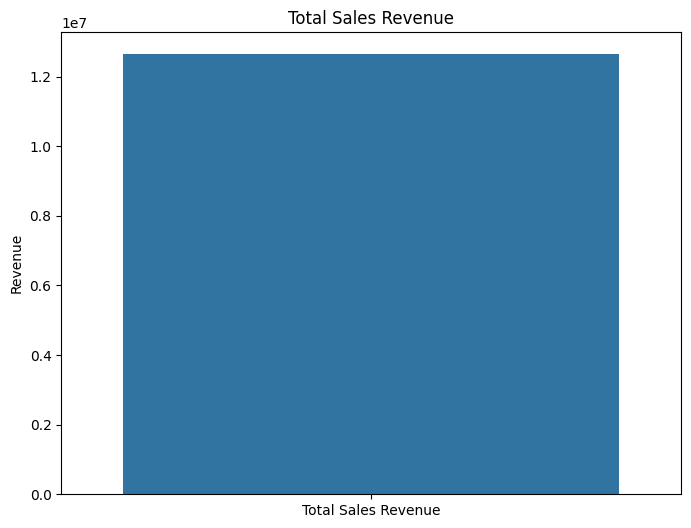

In [27]:
# Total Sales Revenue
total_sales = df['Sales'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Total Sales Revenue'], y=[total_sales])
plt.title('Total Sales Revenue')
plt.ylabel('Revenue')
plt.show()

In [28]:
# Converting Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

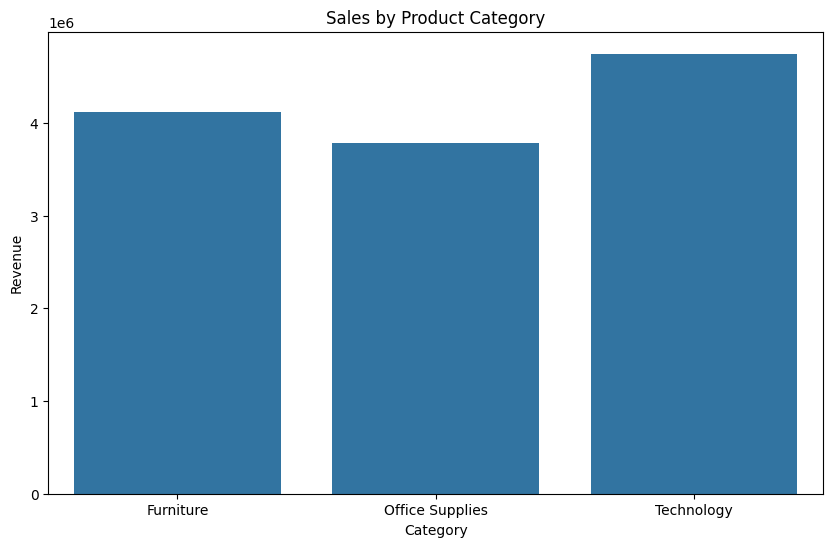

In [18]:
# Sales by Product Category

category_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Sales by Product Category')
plt.ylabel('Revenue')
plt.show()

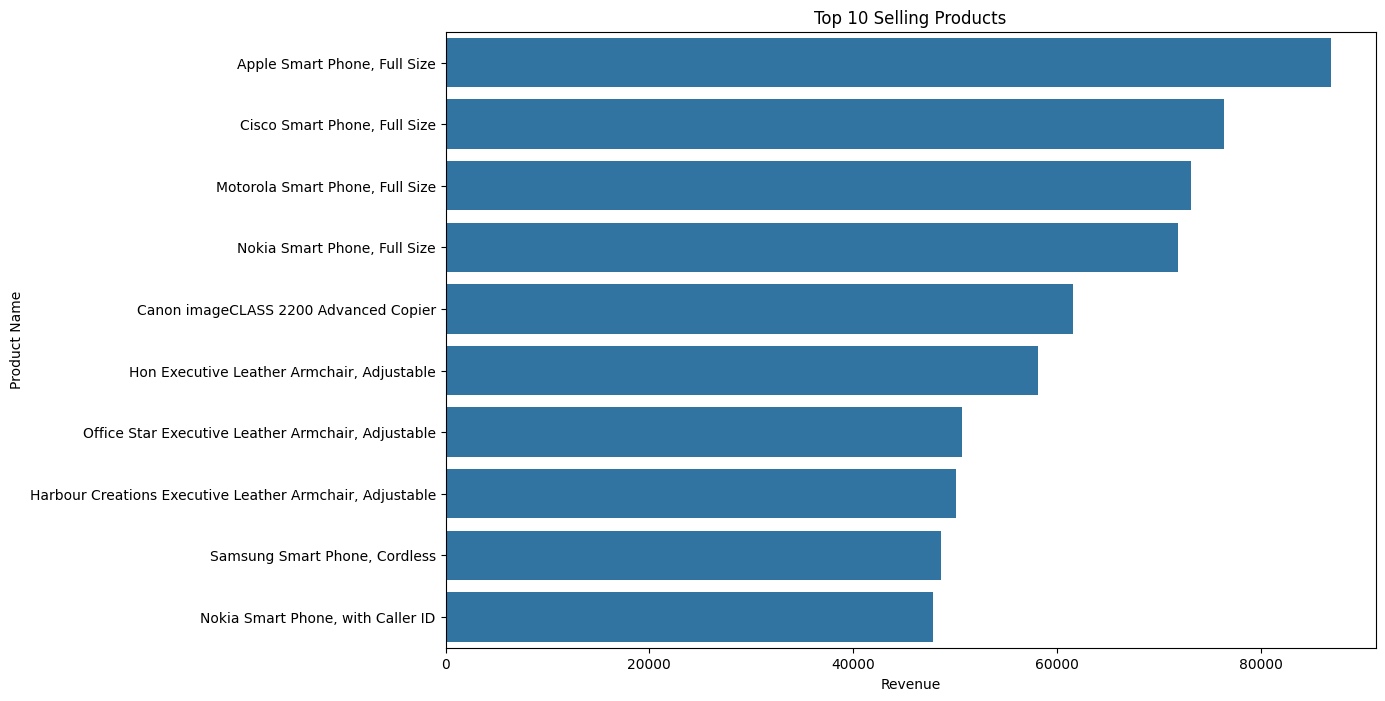

In [19]:
#Top Selling Products
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()
top_products = product_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Product Name', data=top_products)
plt.title('Top 10 Selling Products')
plt.xlabel('Revenue')
plt.show()

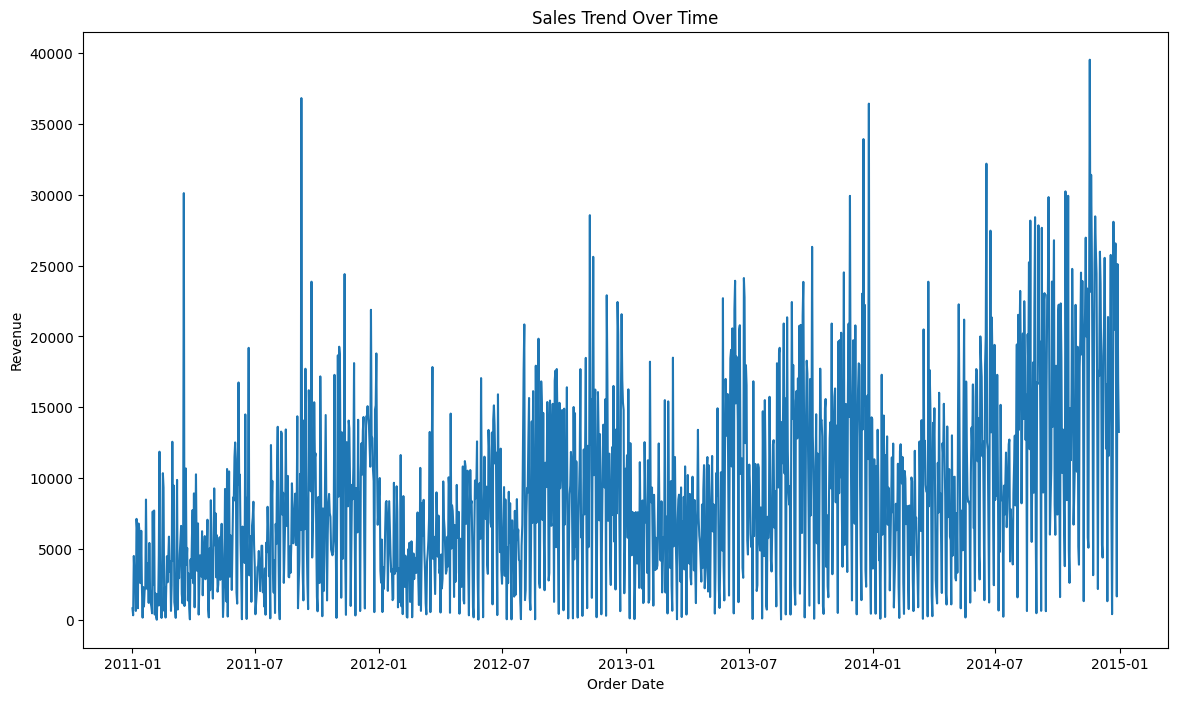

In [20]:
# Sales Trend Over Time
sales_trend = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Order Date', y='Sales', data=sales_trend)
plt.title('Sales Trend Over Time')
plt.ylabel('Revenue')
plt.show()


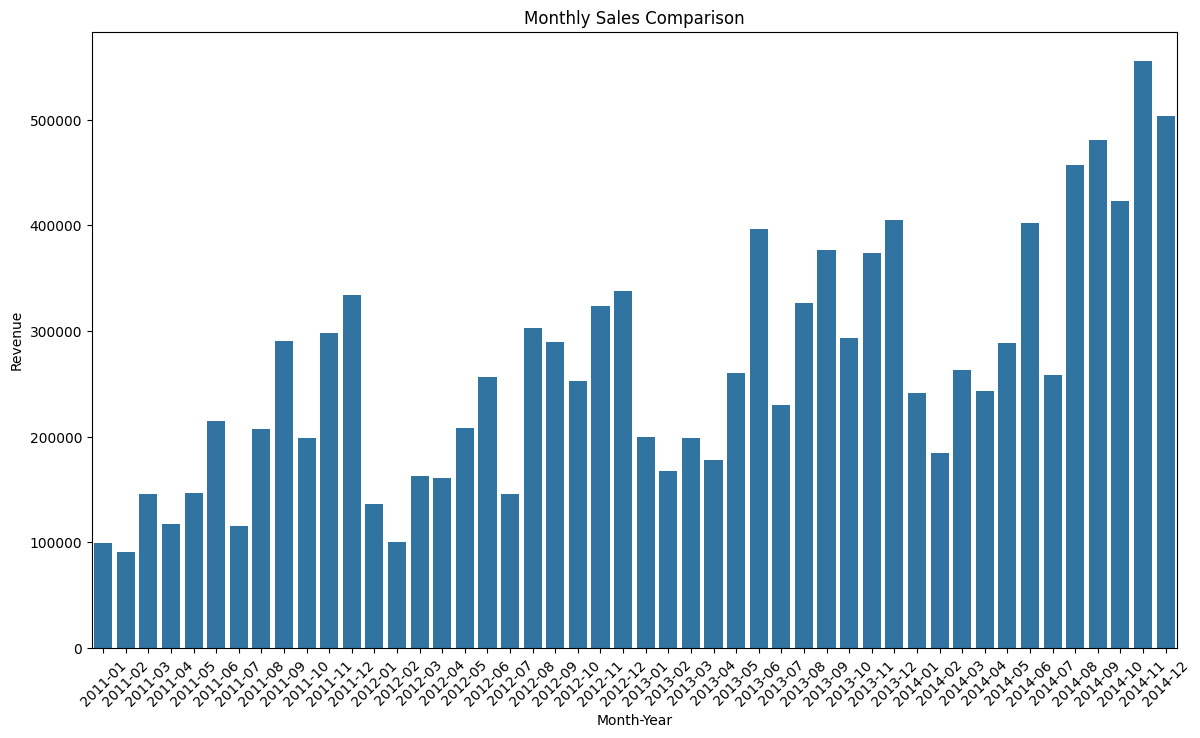

In [25]:
## Monthly Sales Comparison
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='Month-Year', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Comparison')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()